In [1]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# **1-User Credit Prediction**


Mean Squared Error: 28797.50855500036


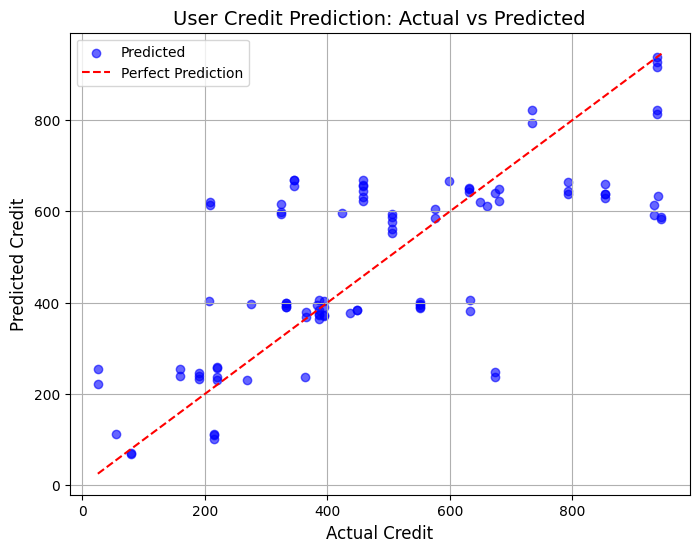

In [27]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# Query for user data and demographics
query = """
SELECT u.user_id, u.phone_credit, dd.year, dd.month, dd.day, ud.age_group, ud.city, ud.region, t.amount
FROM User_Dimension u
JOIN Transaction_Fact t ON u.user_id = t.user_id
JOIN Date_Dimension dd ON t.date_id = dd.date_id
JOIN User_Demographics_Dimension ud ON u.user_demographics_id = ud.user_demographics_id;
"""

data = pd.read_sql_query(query, conn)

# Convert date into datetime and extract month
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['month'] = data['date'].dt.month

# Features (X) and target (y)
X = data[['month', 'age_group', 'city', 'region', 'amount']]
y = data['phone_credit']

# One-hot encoding categorical columns
X = pd.get_dummies(X, columns=['age_group', 'city', 'region'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot Actual vs Predicted
# Improved plot with line of perfect prediction and enhanced aesthetics
plt.figure(figsize=(8, 6))

# Scatter plot for Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')

# Line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and Title
plt.xlabel('Actual Credit', fontsize=12)
plt.ylabel('Predicted Credit', fontsize=12)
plt.title('User Credit Prediction: Actual vs Predicted', fontsize=14)
plt.legend()

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()



# **2. Service Demand Forecasting**

Mean Squared Error: 108472.65445311123


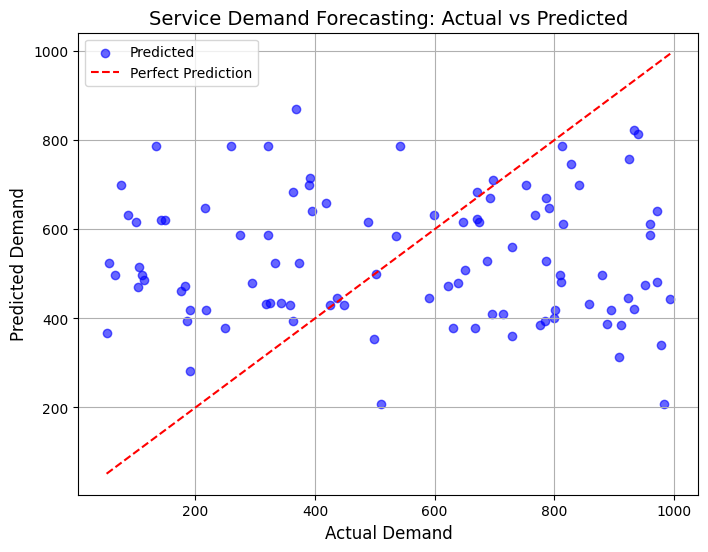

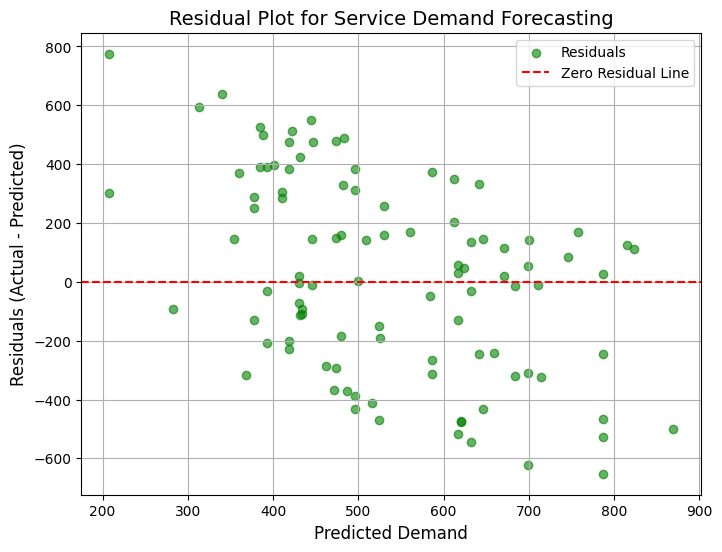

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# Query for service demand data
query = """
SELECT s.service_id, s.service_type, dd.year, dd.month, dd.day, t.amount
FROM Service_Dimension s
JOIN Transaction_Fact t ON s.service_id = t.service_id
JOIN Date_Dimension dd ON t.date_id = dd.date_id;
"""
service_data = pd.read_sql_query(query, conn)

# Convert date and extract month
service_data['date'] = pd.to_datetime(service_data[['year', 'month', 'day']])
service_data['month'] = service_data['date'].dt.month

# Features (X) and target (y)
X = service_data[['month', 'service_type']]
y = service_data['amount']

# One-hot encoding service_type
X = pd.get_dummies(X, columns=['service_type'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')

# Line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and Title
plt.xlabel('Actual Demand', fontsize=12)
plt.ylabel('Predicted Demand', fontsize=12)
plt.title('Service Demand Forecasting: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Residual Plot ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')

# Labels and Title
plt.xlabel('Predicted Demand', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot for Service Demand Forecasting', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()




# **3. Transaction Amount Prediction**

Mean Squared Error: 95311.82882299653


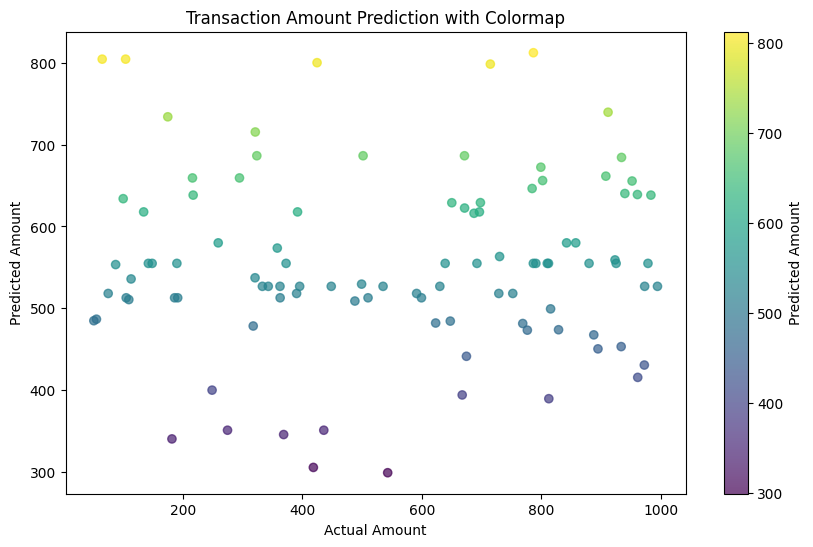

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# Query for transaction amount data
query = """
SELECT t.transaction_id, u.user_id, t.amount, dd.year, dd.month, dd.day
FROM Transaction_Fact t
JOIN User_Dimension u ON t.user_id = u.user_id
JOIN Date_Dimension dd ON t.date_id = dd.date_id;
"""
transaction_data = pd.read_sql_query(query, conn)

# Convert date and extract month
transaction_data['date'] = pd.to_datetime(transaction_data[['year', 'month', 'day']])
transaction_data['month'] = transaction_data['date'].dt.month

# Features (X) and target (y)
X = transaction_data[['month', 'user_id']]
y = transaction_data['amount']

# One-hot encoding user_id
X = pd.get_dummies(X, columns=['user_id'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot Actual vs Predicted
# Plot Actual vs Predicted with color based on predicted amount
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Amount')  # Color bar to show the scale
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Transaction Amount Prediction with Colormap')
plt.show()



# **4. Charity Donation Prediction**

Mean Squared Error: 100596.06320075724


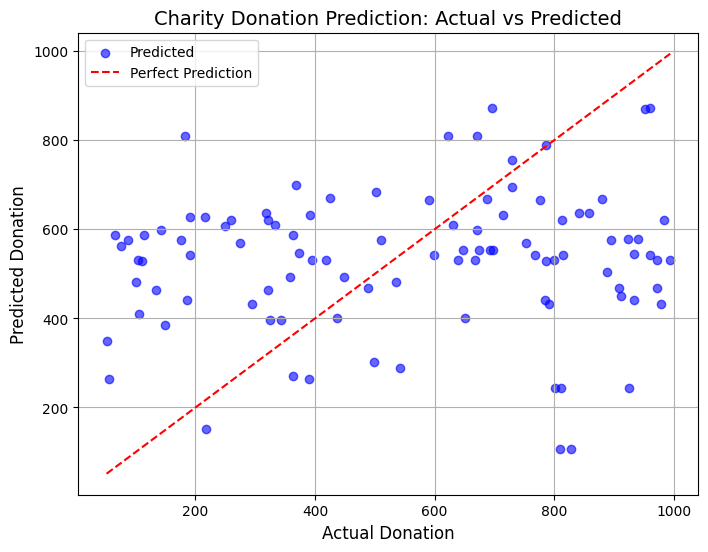

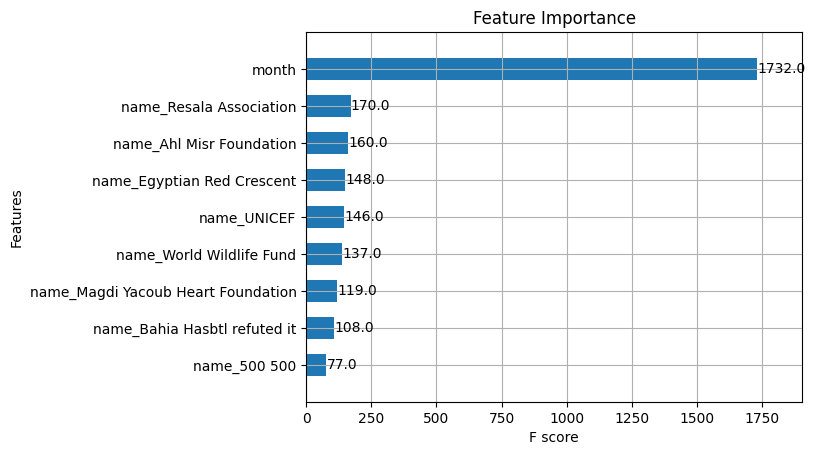

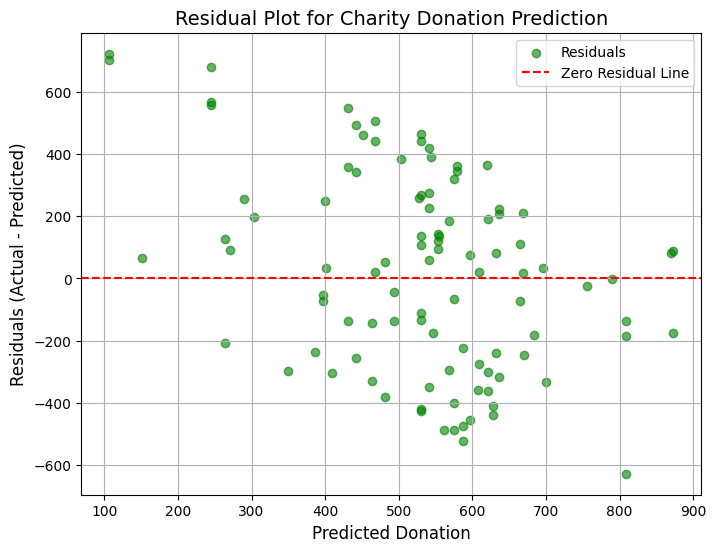

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# Query for charity donation data
query = """
SELECT c.charity_id, c.name, dd.year, dd.month, dd.day, t.amount
FROM Charity_Dimension c
JOIN Transaction_Fact t ON c.charity_id = t.charity_id
JOIN Date_Dimension dd ON t.date_id = dd.date_id;
"""
charity_data = pd.read_sql_query(query, conn)

# Convert date and extract month
charity_data['date'] = pd.to_datetime(charity_data[['year', 'month', 'day']])
charity_data['month'] = charity_data['date'].dt.month

# Features (X) and target (y)
X = charity_data[['month', 'name']]
y = charity_data['amount']

# One-hot encoding charity name
X = pd.get_dummies(X, columns=['name'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')

# Line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and Title
plt.xlabel('Actual Donation', fontsize=12)
plt.ylabel('Predicted Donation', fontsize=12)
plt.title('Charity Donation Prediction: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Feature Importance ---
xgb.plot_importance(model, importance_type='weight', title='Feature Importance', height=0.6, max_num_features=10)
plt.show()

# --- Plot 3: Residual Plot ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')

# Labels and Title
plt.xlabel('Predicted Donation', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot for Charity Donation Prediction', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


# **5. Transaction Type Prediction**

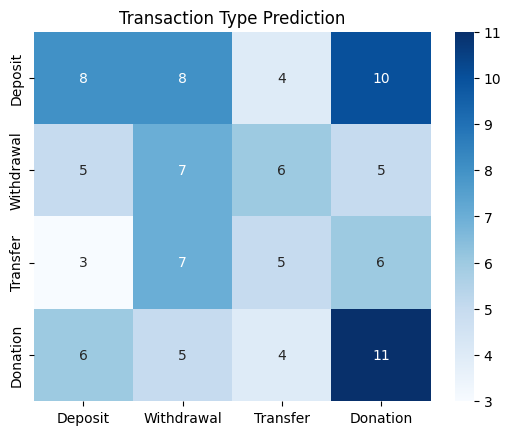

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# Query for transaction type data
query = """
SELECT t.transaction_id, u.user_id, t.transaction_type_id, dd.year, dd.month, dd.day
FROM Transaction_Fact t
JOIN User_Dimension u ON t.user_id = u.user_id
JOIN Date_Dimension dd ON t.date_id = dd.date_id;
"""
transaction_type_data = pd.read_sql_query(query, conn)

# Convert date and extract month
transaction_type_data['date'] = pd.to_datetime(transaction_type_data[['year', 'month', 'day']])
transaction_type_data['month'] = transaction_type_data['date'].dt.month

# Features (X) and target (y)
X = transaction_type_data[['month', 'user_id']]
y = transaction_type_data['transaction_type_id']

# One-hot encoding user_id
X = pd.get_dummies(X, columns=['user_id'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Deposit', 'Withdrawal', 'Transfer', 'Donation'], yticklabels=['Deposit', 'Withdrawal', 'Transfer', 'Donation'])
plt.title('Transaction Type Prediction')
plt.show()


# **6-Charity Category Preference Prediction**

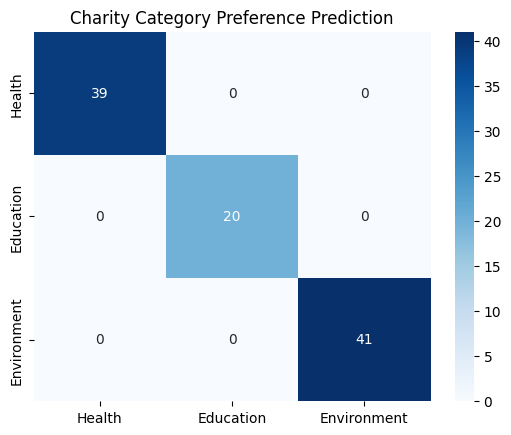

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database
db_path = 'datawarehouse.db'
conn = sqlite3.connect(db_path)

# Query for charity category preference data
query = """
SELECT c.charity_category_id, cc.category_name, t.user_id, dd.year, dd.month, dd.day, t.amount
FROM Charity_Dimension c
JOIN Charity_Category_Dimension cc ON c.charity_category_id = cc.charity_category_id
JOIN Transaction_Fact t ON c.charity_id = t.charity_id
JOIN Date_Dimension dd ON t.date_id = dd.date_id;
"""
charity_category_data = pd.read_sql_query(query, conn)

# Convert date and extract month
charity_category_data['date'] = pd.to_datetime(charity_category_data[['year', 'month', 'day']])
charity_category_data['month'] = charity_category_data['date'].dt.month

# Features (X) and target (y)
X = charity_category_data[['month', 'user_id', 'category_name']]
y = charity_category_data['charity_category_id']

# One-hot encoding user_id and category_name
X = pd.get_dummies(X, columns=['user_id', 'category_name'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Health', 'Education', 'Environment'], yticklabels=['Health', 'Education', 'Environment'])
plt.title('Charity Category Preference Prediction')
plt.show()
